<a href="https://colab.research.google.com/github/ziathak/FD-SOM/blob/master/FD_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# import dataset
dataset = pd.read_csv('/content/drive/My Drive/Self_Organizing_Maps/Credit_Card_Applications.csv')
# create subsets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [5]:
pip install minisom

  Stored in directory: /root/.cache/pip/wheels/f8/32/ba/ca4264f6b795502698c8db8b07011a953e5fe34457a49c0860
Successfully built minisom


In [0]:
# training the SOM
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

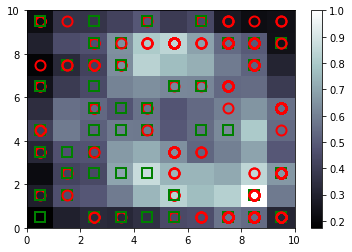

In [7]:
# visualise results

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [16]:
# finding the frauds!

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8, 1)], mappings[(5,8)]), axis = 0)

frauds = sc.inverse_transform(frauds)
print(frauds[:,0])

[15648069. 15575605. 15644453. 15646594. 15699238. 15593959. 15629750.
 15592999. 15577771. 15593834. 15599272. 15609758. 15611682. 15608916.
 15618258. 15711446. 15596797. 15688210. 15575438. 15592914. 15611973.
 15593178. 15573077. 15735106. 15646521. 15638272. 15599152. 15683276.
 15652289. 15642001. 15768777. 15649101. 15643574. 15600027. 15615670.
 15599535. 15678779. 15730150.]
